# Analysis

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from random import sample
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
average_df = pd.read_csv("../data/average_df.csv")

In [3]:
rolling_df = pd.read_csv("../data/rolling_df.csv")

## Regressions

In [4]:
def logistic_model(Xtrain, Xtest, ytrain, ytest, x):
    #model
    logistic = LogisticRegression(max_iter= 10000)
    logistic.fit(Xtrain, ytrain)
    #get metrics
    score = logistic.score(Xtest, ytest)
    matrix = confusion_matrix(ytest, logistic.predict(Xtest))
    #feature importance
    feature_importance = pd.DataFrame({'Feature': x.columns, 'Value':logistic.coef_[0] })
    feature_importance = feature_importance.sort_values('Value', ascending=True)
    #print metrics
    print("Model Score:", score)
    print(matrix)
    return feature_importance.plot(x='Feature', y='Value', kind='barh', figsize=(10, 6))

In [5]:
def rf_model(Xtrain, Xtest, ytrain, ytest, x):
    #model
    rfmodel = RandomForestClassifier( random_state=13)
    rfmodel.fit(Xtrain, ytrain)
    #metrics
    score = rfmodel.score(Xtest, ytest)
    matrix = confusion_matrix(ytest, rfmodel.predict(Xtest))
    #feature importance
    feature_importance = pd.DataFrame({'Feature': x.columns, 'Value':rfmodel.feature_importances_ })
    feature_importance = feature_importance.sort_values('Value', ascending=True)
    print("Model Score:", score)
    print(matrix)
    return feature_importance.plot(x='Feature', y='Value', kind='barh', figsize=(10, 6))

### Average

#### Logistic

In [6]:
average_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
average_df = average_df.dropna(axis = 0)
average_df.shape

(5126, 42)

Model Score: 0.6929824561403509
[[346 154]
 [161 365]]


<AxesSubplot:ylabel='Feature'>

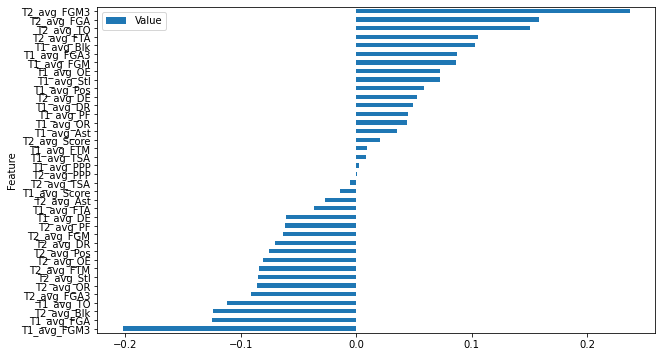

In [8]:
y = average_df.outcome
x= average_df.drop(['outcome', 'T1_Score','T2_Score', 'Unnamed: 0'], axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=13)
logistic_model(Xtrain, Xtest, ytrain, ytest, x)

#### Random Forest

Model Score: 0.6764132553606238
[[333 167]
 [165 361]]


<AxesSubplot:ylabel='Feature'>

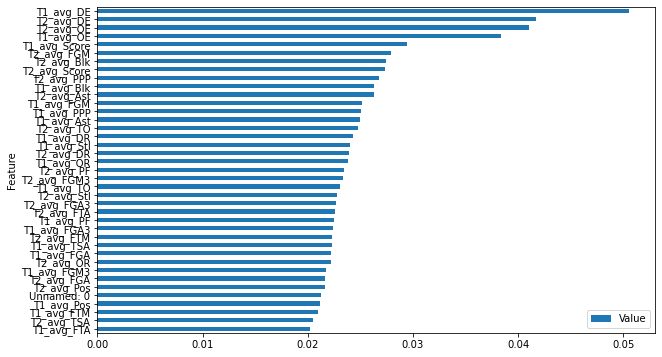

In [9]:
#independent and dependent
y = average_df.outcome
x= average_df.drop(['outcome', 'T1_Score','T2_Score'], axis=1)
#split
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=13)
rf_model(Xtrain, Xtest, ytrain, ytest, x)

### PCA

#### Average

In [10]:
average_df = average_df.dropna(axis = 0)

scaler = StandardScaler()

y = average_df['outcome']

avg_pca = average_df.drop(['outcome', 'T1_Score', 'T2_Score', 'Unnamed: 0'], axis = 1)
avg_pca.columns

Index(['T1_avg_Score', 'T1_avg_FGM', 'T1_avg_FGA', 'T1_avg_FGM3',
       'T1_avg_FGA3', 'T1_avg_FTA', 'T1_avg_FTM', 'T1_avg_OR', 'T1_avg_DR',
       'T1_avg_Ast', 'T1_avg_TO', 'T1_avg_Stl', 'T1_avg_Blk', 'T1_avg_PF',
       'T1_avg_Pos', 'T1_avg_OE', 'T1_avg_DE', 'T1_avg_TSA', 'T1_avg_PPP',
       'T2_avg_Score', 'T2_avg_FGM', 'T2_avg_FGA', 'T2_avg_FGM3',
       'T2_avg_FGA3', 'T2_avg_FTA', 'T2_avg_FTM', 'T2_avg_OR', 'T2_avg_DR',
       'T2_avg_Ast', 'T2_avg_TO', 'T2_avg_Stl', 'T2_avg_Blk', 'T2_avg_PF',
       'T2_avg_Pos', 'T2_avg_OE', 'T2_avg_DE', 'T2_avg_TSA', 'T2_avg_PPP'],
      dtype='object')

In [11]:
avg_pca = pd.DataFrame.from_records(scaler.fit_transform(avg_pca), 
                                     columns = avg_pca.columns)
avg_pca.head()

,T1_avg_Score,T1_avg_FGM,T1_avg_FGA,T1_avg_FGM3,T1_avg_FGA3,T1_avg_FTA,T1_avg_FTM,T1_avg_OR,T1_avg_DR,T1_avg_Ast,T1_avg_TO,T1_avg_Stl,T1_avg_Blk,T1_avg_PF,T1_avg_Pos,T1_avg_OE,T1_avg_DE,T1_avg_TSA,T1_avg_PPP,T2_avg_Score,T2_avg_FGM,T2_avg_FGA,T2_avg_FGM3,T2_avg_FGA3,T2_avg_FTA,T2_avg_FTM,T2_avg_OR,T2_avg_DR,T2_avg_Ast,T2_avg_TO,T2_avg_Stl,T2_avg_Blk,T2_avg_PF,T2_avg_Pos,T2_avg_OE,T2_avg_DE,T2_avg_TSA,T2_avg_PPP
0,2.813300,4.820728,1.927649,-0.207104,0.787056,-1.634408,-2.090764,0.236207,4.297262,3.786604,2.721776,0.866004,2.878635,-0.013279,5.805734,-0.928004,0.300753,2.585313,-0.857960,0.405944,-1.951830,-3.239506,-0.223353,-0.551992,5.337308,5.163463,-1.323272,-1.510530,-2.855106,5.644899,2.747752,-1.749334,4.033094,-0.344517,0.861218,0.994233,1.365610,0.791019
1,-3.835153,-4.195127,-1.102693,-0.207104,1.052384,-1.043843,-1.705781,-1.801631,1.406665,-1.972336,-0.301247,-1.020521,-1.772618,-1.373366,-3.413209,-2.886118,0.116283,-4.274697,-2.810179,-3.293848,-2.707238,-2.699629,-2.677494,0.241083,-0.738167,-1.694714,-2.889433,-2.332385,-2.436942,-2.764785,-0.989654,1.290740,1.338076,-2.519714,-2.730525,3.499010,-2.588002,-2.708400
2,0.691453,-0.438520,1.101192,0.988107,0.521729,2.499545,2.144050,0.236207,1.406665,0.495781,1.210265,0.866004,4.429053,2.706895,1.282006,-0.186933,0.915133,-0.599692,-0.257277,1.828941,2.202911,1.349451,-0.836888,-1.345067,1.576300,0.972355,2.331103,2.598746,1.744696,-0.291348,-0.366753,1.290740,-1.806112,0.385770,2.085919,-1.051811,0.871409,2.008208
3,1.398736,0.312801,-1.929149,-1.999922,-1.070235,5.452369,4.453948,-1.292171,-0.658047,1.318487,0.706428,0.237163,2.878635,0.440083,-0.046531,1.929335,-0.923316,1.605312,1.995285,2.255840,2.580615,3.239021,2.230788,2.355950,-0.448859,-0.551685,0.764942,5.064311,2.162860,1.687401,-2.235456,-1.749334,0.888906,3.880575,-0.320778,-0.285140,0.624308,-0.274022
4,3.944952,2.942425,1.101192,2.780924,2.113693,2.204263,2.914016,3.292963,0.167838,-1.972336,-0.301247,4.639054,-0.222200,-1.826728,1.374649,3.804606,-2.689853,3.320314,3.797334,-0.305554,-0.063311,-1.889813,0.390183,-1.080708,-0.738167,-0.932694,-2.889433,-3.565168,-2.855106,0.698026,2.747752,-0.229297,0.439737,1.211993,-1.412790,3.349802,1.365610,-1.339062


In [12]:
pca=PCA()
pca.fit(avg_pca)

PCA()

In [13]:
fd = pca.components_
matrix = np.transpose(fd)
df_fl = pd.DataFrame(data=matrix, index= avg_pca.columns,
                     columns=['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 
                              'Z15','Z16', 'Z17', 'Z18', 'Z19', 'Z20', 'Z21', 'Z22', 'Z23', 'Z24', 'Z25', 'Z26', 'Z27', 
                              'Z28','Z29', 'Z30', 'Z31', 'Z32', 'Z33', 'Z34', 'Z35', 'Z36', 'Z37', 'Z38'])
df_fl

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Z21,Z22,Z23,Z24,Z25,Z26,Z27,Z28,Z29,Z30,Z31,Z32,Z33,Z34,Z35,Z36,Z37,Z38
T1_avg_Score,0.261506,0.265598,-0.012969,-0.026174,0.049580,0.008620,0.120723,-0.070702,0.027686,-0.021791,-0.083781,0.021726,-0.079998,0.070985,-0.003928,0.004560,-0.027184,-0.010460,-0.056719,-0.039336,0.101493,-0.069021,-0.030313,-0.015662,0.002374,0.006599,0.004521,-0.010891,-0.013589,-0.000594,-0.267483,-0.078769,0.177142,0.341584,0.001158,0.032942,-6.251292e-01,0.421910
T1_avg_FGM,0.236835,0.238490,-0.032560,-0.069428,0.166432,-0.070723,0.037486,-0.026591,0.133437,0.096061,-0.149028,0.032230,-0.204463,0.173187,-0.053614,-0.019259,0.081228,0.036435,0.007116,-0.027011,0.151530,-0.097971,-0.012009,-0.011004,0.013292,-0.055524,-0.058074,0.142412,0.308345,-0.063005,-0.256905,-0.071175,0.182122,0.354399,0.000653,0.033789,4.707501e-01,-0.317712
T1_avg_FGA,0.140915,0.144154,0.045068,-0.206847,0.225775,-0.246261,-0.005255,0.236155,-0.173603,-0.151625,0.069766,-0.089417,-0.264651,0.303025,0.081839,0.042168,-0.191979,-0.068299,-0.097737,-0.051368,-0.095369,0.043203,-0.097116,-0.047608,0.100293,0.406446,0.015040,-0.064050,-0.028437,-0.020767,0.460999,0.188206,0.061630,0.037926,-0.000260,0.020589,-6.439976e-05,-0.000085
T1_avg_FGM3,0.141930,0.144746,-0.286275,0.020247,0.254543,0.157710,0.038313,-0.007015,-0.204966,-0.211373,0.093148,-0.019592,0.219905,-0.239094,0.023686,0.042620,0.033429,-0.000697,0.012920,0.009638,0.096988,-0.077566,0.094069,0.118185,-0.116950,0.132813,0.317876,-0.589850,-0.095810,0.056317,-0.087951,-0.031429,0.044212,0.082456,-0.001127,0.010405,1.479710e-01,-0.099860
T1_avg_FGA3,0.093916,0.084696,-0.249601,-0.038784,0.271475,0.088320,0.002625,0.100023,-0.324706,-0.286364,0.238705,-0.071937,0.262876,-0.227934,0.073330,0.045553,-0.189660,-0.077697,-0.029598,0.039273,-0.026552,0.005508,-0.128310,-0.120058,0.049294,-0.277182,-0.242171,0.471337,0.113566,-0.037502,0.003210,0.004076,0.003741,0.011650,0.001332,0.000762,-5.612252e-06,-0.000001
T1_avg_FTA,0.120929,0.127859,0.270760,0.027402,-0.367426,0.014724,0.227646,-0.120052,-0.065318,-0.112415,0.053089,-0.011389,0.087738,-0.032975,0.050851,0.005127,-0.218743,-0.085598,-0.118166,-0.029716,-0.125325,0.076264,-0.053557,0.003675,-0.122867,-0.275429,0.155739,-0.230550,0.588421,-0.064207,0.205046,0.082073,0.014711,0.003835,-0.002981,0.009505,-2.633607e-05,-0.000043
T1_avg_FTM,0.134850,0.140781,0.215860,0.057996,-0.370178,0.066833,0.227015,-0.133409,-0.066136,-0.120035,0.017425,0.005706,0.059689,-0.007782,0.083849,0.024465,-0.261984,-0.102581,-0.177306,-0.057918,-0.096770,0.062965,-0.118341,-0.096291,0.054532,0.046271,-0.073441,0.058538,-0.607179,0.091326,-0.144701,-0.048315,0.080785,0.150169,0.002359,0.013755,2.297216e-01,-0.154982
T1_avg_OR,0.110248,0.101795,0.227971,-0.182199,-0.074864,-0.231745,-0.116809,0.300602,-0.216598,-0.087690,0.153447,-0.155327,-0.006637,0.086400,-0.189827,-0.156949,0.333571,0.088745,-0.164383,-0.245734,0.074564,-0.014231,0.291607,0.160099,-0.136239,-0.416594,0.014357,-0.011778,-0.194460,0.063984,-0.009462,-0.010054,-0.015911,-0.027359,0.001482,-0.002496,1.146344e-06,0.000018
T1_avg_DR,0.170557,0.133472,0.028752,0.010506,-0.012669,-0.068945,0.023024,-0.092685,0.209201,0.175287,0.493028,-0.311481,0.052482,0.128249,-0.081037,-0.103714,-0.207998,0.022961,0.325480,0.482391,-0.084010,-0.032628,0.264986,0.140502,-0.036399,0.001843,-0.016827,0.022399,-0.065899,-0.002845,-0.000896,-0.004421,-0.000603,0.004020,-0.000194,0.000403,3.471095e-06,-0.000004
T1_avg_Ast,0.202486,0.195332,-0.068485,-0.032228,0.162948,-0.011887,-0.002037,-0.097989,0.147206,0.098811,-0.059812,0.036169,0.093789,-0.140604,-0.092271,-0.131326,0.261622,0.087731,0.052538,-0.146005,-0.681114,0.466276,-0.060064,-0.010832,0.039304,0.021315,0.001217,0.005984,-0.016803,0.018359,0.005907,-0.000873,-0.005937,-0.012881,-0.000476,-0.001760,1.506658e-05,0.000012


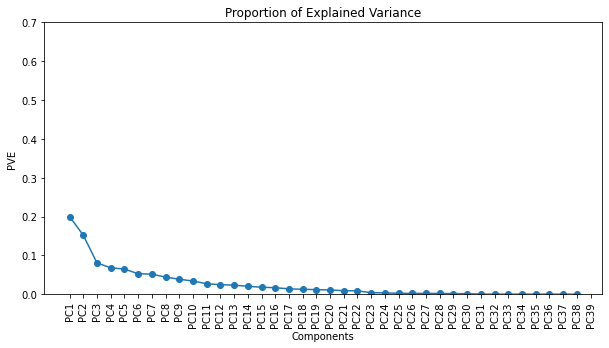

In [14]:
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_,marker = 'o')
plt.xlabel("Components")
plt.ylabel("PVE")
plt.ylim(0,.7)
plt.xticks(np.arange(39),('PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
                         'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25',
                         'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
                         'PC38', 'PC39'), rotation = 'vertical')
plt.title("Proportion of Explained Variance")
plt.show()

In [15]:
pca = PCA(10)
pca.fit(avg_pca)
fd = pca.components_
matrix = np.transpose(fd)
df_fl = pd.DataFrame(data=matrix, index= avg_pca.columns,
                     columns=['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10'])
df_fl

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10
T1_avg_Score,0.261506,0.265598,-0.012970,-0.026173,0.049584,0.008624,0.120739,-0.070731,0.027749,-0.021851
T1_avg_FGM,0.236835,0.238490,-0.032561,-0.069428,0.166435,-0.070720,0.037498,-0.026608,0.133484,0.096017
T1_avg_FGA,0.140915,0.144154,0.045067,-0.206846,0.225779,-0.246256,-0.005241,0.236124,-0.173555,-0.151672
T1_avg_FGM3,0.141930,0.144746,-0.286275,0.020247,0.254543,0.157709,0.038314,-0.007010,-0.204976,-0.211360
T1_avg_FGA3,0.093916,0.084696,-0.249600,-0.038784,0.271474,0.088319,0.002621,0.100031,-0.324735,-0.286336
T1_avg_FTA,0.120929,0.127859,0.270759,0.027403,-0.367424,0.014727,0.227656,-0.120078,-0.065276,-0.112458
T1_avg_FTM,0.134850,0.140781,0.215858,0.057997,-0.370173,0.066839,0.227035,-0.133456,-0.066054,-0.120116
T1_avg_OR,0.110248,0.101795,0.227967,-0.182196,-0.074852,-0.231725,-0.116756,0.300497,-0.216407,-0.087866
T1_avg_DR,0.170557,0.133472,0.028759,0.010499,-0.012691,-0.068980,0.022926,-0.092493,0.208838,0.175634
T1_avg_Ast,0.202486,0.195332,-0.068485,-0.032229,0.162946,-0.011888,-0.002047,-0.097991,0.147185,0.098820


In [16]:
avg_scored = pd.DataFrame(pca.fit_transform(avg_pca))
avg_scored.columns = ['Eig1', 'Eig2', 'Eig3', 'Eig4', 'Eig5', 'Eig6', 'Eig7', 'Eig8', 'Eig9', 'Eig10']
avg_scored.head()

,Eig1,Eig2,Eig3,Eig4,Eig5,Eig6,Eig7,Eig8,Eig9,Eig10
0,3.477745,4.654627,4.006112,1.877316,10.096663,-1.355538,6.481933,2.195278,-3.116390,5.952126
1,-11.633919,0.657555,-1.886092,1.897466,-0.425043,-0.374732,-2.323506,1.806937,0.697696,0.649137
2,5.264099,-2.437383,3.875234,-0.230766,0.370094,-1.870971,1.734341,-1.985612,-0.538696,-3.257858
3,5.829133,-1.327411,1.758011,-3.450798,-6.999030,2.884892,4.249915,-1.415915,-1.649170,0.904647
4,3.971998,9.037313,0.308962,-1.509850,-1.966468,1.049892,1.357165,4.571258,1.530361,-0.384240


#### Logistic with PCA

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(avg_scored, y, test_size=0.2, random_state=13)

Model Score: 0.6871345029239766
[[345 155]
 [166 360]]


<AxesSubplot:ylabel='Feature'>

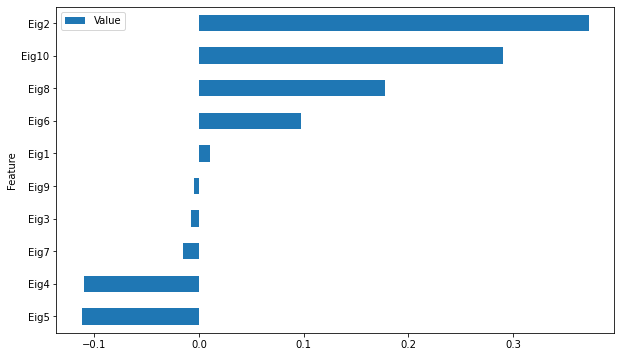

In [18]:
logistic_model(Xtrain, Xtest, ytrain, ytest, avg_scored)

#### Random Forest

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(avg_scored, y, test_size=0.2, random_state=13)

Model Score: 0.6764132553606238
[[330 170]
 [162 364]]


<AxesSubplot:ylabel='Feature'>

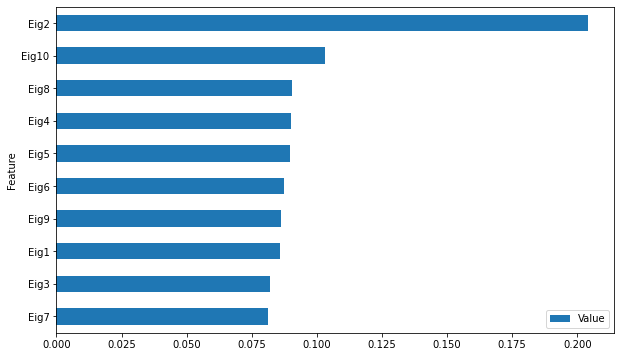

In [20]:
rf_model(Xtrain, Xtest, ytrain, ytest, avg_scored)

### Rolling Average

In [21]:
#drops more na since there needs to be 5 games for each team to start
rolling_df = rolling_df.dropna(axis = 0)
rolling_df.shape

(3408, 45)

#### Logistic

In [22]:
rolling_df.head()

,Unnamed: 0,T1_Score,T1_roll_Score,T1_roll_FGM,T1_roll_FGA,T1_roll_FGM3,T1_roll_FGA3,T1_roll_FTA,T1_roll_FTM,T1_roll_OR,T1_roll_DR,T1_roll_Ast,T1_roll_TO,T1_roll_Stl,T1_roll_Blk,T1_roll_PF,T1_roll_Pos,T1_roll_OE,T1_roll_DE,T1_roll_TSA,T1_roll_PPP,gameID,team_id_x,T2_Score,T2_roll_Score,T2_roll_FGM,T2_roll_FGA,T2_roll_FGM3,T2_roll_FGA3,T2_roll_FTA,T2_roll_FTM,T2_roll_OR,T2_roll_DR,T2_roll_Ast,T2_roll_TO,T2_roll_Stl,T2_roll_Blk,T2_roll_PF,T2_roll_Pos,T2_roll_OE,T2_roll_DE,T2_roll_TSA,T2_roll_PPP,team_id_y,outcome
1386,1386,75.0,63.9,24.3,59.4,5.9,20.4,13.7,9.4,7.9,22.7,10.4,13.0,6.9,5.0,19.4,80.85,78.99,93.24,0.49,0.79,1385.0,1164.0,62.0,65.7,22.7,60.1,8.2,29.2,17.3,12.1,8.0,24.5,11.3,12.3,7.9,2.3,15.6,78.91,82.91,94.37,0.48,0.83,1203.0,1
1458,1458,60.0,78.9,28.9,57.2,7.5,19.6,17.6,13.6,6.2,25.0,16.9,11.1,5.8,2.4,15.2,86.15,91.26,92.05,0.61,0.91,1457.0,1143.0,72.0,65.6,24.5,55.9,5.4,16.1,15.8,11.2,7.0,25.9,9.8,10.9,5.0,2.2,15.8,73.51,89.79,91.94,0.52,0.90,1365.0,0
1520,1520,75.0,65.0,22.9,61.2,7.9,29.4,15.8,11.3,7.7,24.9,10.6,12.0,8.0,2.6,14.5,79.43,81.43,91.11,0.47,0.81,1519.0,1406.0,89.0,71.4,24.6,56.5,7.1,21.4,21.5,15.1,10.1,23.7,12.3,10.8,7.3,2.3,19.4,72.77,98.72,90.31,0.55,0.99,1164.0,0
1545,1545,57.0,71.6,26.6,57.6,8.9,22.0,13.1,9.5,7.9,24.6,14.0,10.4,5.2,3.0,13.9,76.93,93.09,77.07,0.56,0.93,1544.0,1173.0,62.0,71.6,26.0,54.2,6.5,20.0,18.2,13.1,8.4,24.3,13.7,12.7,5.3,4.0,14.5,75.17,95.78,85.52,0.58,0.96,1439.0,0
1549,1549,91.0,75.0,25.0,59.0,7.1,22.1,24.7,17.9,11.0,25.5,14.7,13.7,5.9,6.2,18.5,76.45,98.18,85.14,0.54,0.98,1548.0,1463.0,77.0,72.2,25.4,62.4,8.5,26.0,18.0,12.9,9.0,26.3,13.0,11.0,4.9,2.8,18.1,78.83,91.30,89.70,0.51,0.91,1233.0,1


In [23]:
#independent and dependent variable
y = rolling_df.outcome
x = rolling_df.drop(['outcome','T1_Score', 'T2_Score', 'gameID', 'Unnamed: 0'], axis=1)

In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=13)

Model Score: 0.6862170087976539
[[238 110]
 [104 230]]


<AxesSubplot:ylabel='Feature'>

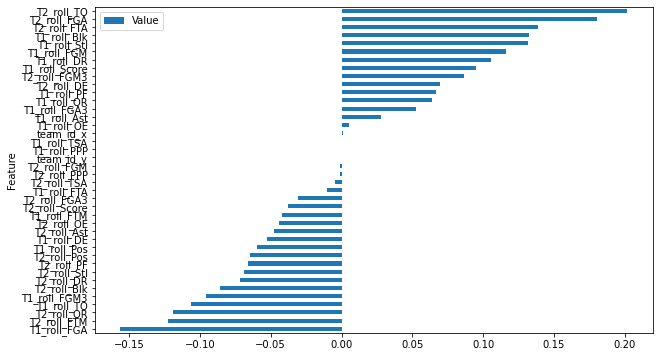

In [25]:
logistic_model(Xtrain, Xtest, ytrain, ytest, x)

#### Random Forest

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=13)

Model Score: 0.6290322580645161
[[227 121]
 [132 202]]


<AxesSubplot:ylabel='Feature'>

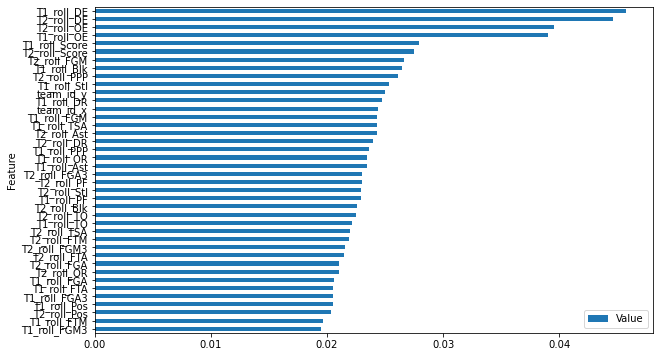

In [27]:
rf_model(Xtrain, Xtest, ytrain, ytest, x)

#### Rolling Average with PCA

In [28]:
rolling_df = rolling_df.dropna(axis = 0)

scaler = StandardScaler()

y = rolling_df['outcome']

rolling_pca = rolling_df.drop(['outcome','T1_Score', 'T2_Score', 'gameID', 'team_id_x', 'team_id_y', 'Unnamed: 0'], axis=1)

In [29]:
#scaling data
rolling_pca = pd.DataFrame.from_records(scaler.fit_transform(rolling_pca), 
                                     columns = rolling_pca.columns)
rolling_pca.head()

,T1_roll_Score,T1_roll_FGM,T1_roll_FGA,T1_roll_FGM3,T1_roll_FGA3,T1_roll_FTA,T1_roll_FTM,T1_roll_OR,T1_roll_DR,T1_roll_Ast,T1_roll_TO,T1_roll_Stl,T1_roll_Blk,T1_roll_PF,T1_roll_Pos,T1_roll_OE,T1_roll_DE,T1_roll_TSA,T1_roll_PPP,T2_roll_Score,T2_roll_FGM,T2_roll_FGA,T2_roll_FGM3,T2_roll_FGA3,T2_roll_FTA,T2_roll_FTM,T2_roll_OR,T2_roll_DR,T2_roll_Ast,T2_roll_TO,T2_roll_Stl,T2_roll_Blk,T2_roll_PF,T2_roll_Pos,T2_roll_OE,T2_roll_DE,T2_roll_TSA,T2_roll_PPP
0,-1.107377,-0.402004,0.596827,-0.961585,-0.367029,-1.188630,-1.269262,-0.243332,-0.294520,-1.178353,0.528709,0.340324,1.592499,1.282588,0.749949,-2.252693,0.505100,-1.432407,-2.243736,-0.758192,-1.083015,0.775117,0.554820,2.049869,-0.025010,-0.158138,-0.182010,0.507092,-0.750314,0.162991,1.026628,-0.820523,-0.556595,0.326033,-1.480530,0.722508,-1.691532,-1.459264
1,1.519374,1.696888,-0.068952,0.092753,-0.593333,0.061801,0.449098,-1.190565,0.773223,1.879658,-0.542908,-0.416068,-0.718363,-0.747249,1.920033,0.075741,0.276565,1.932116,0.027097,-0.775214,-0.291030,-0.454732,-1.267664,-1.547614,-0.504573,-0.529049,-0.753392,1.138650,-1.462179,-0.616464,-0.955047,-0.906888,-0.458112,-0.836339,-0.197568,0.249607,-0.570859,-0.155680
2,-0.914749,-1.040797,1.141555,0.356338,2.178885,-0.515321,-0.491908,-0.354771,0.726800,-1.084260,-0.035300,1.096715,-0.540604,-1.085555,0.436454,-1.789663,0.096041,-1.993160,-1.865264,0.212060,-0.247031,-0.279039,-0.161156,-0.092143,1.317765,1.078234,1.017890,0.146201,-0.275737,-0.672139,0.616627,-0.820523,1.314576,-0.995627,1.467673,-0.067606,0.269646,1.520356
3,0.241022,0.647442,0.052098,1.015300,0.085578,-1.381004,-1.228348,-0.243332,0.587529,0.515314,-0.937715,-0.828645,-0.185087,-1.375532,-0.115473,0.423013,-2.600292,0.530231,0.405569,0.246104,0.368958,-0.952528,-0.551688,-0.476607,0.262727,0.253986,0.046542,0.416869,0.388671,0.385692,-0.750046,0.647690,-1.098249,-0.479017,0.919430,-0.999786,1.110150,0.961677
4,0.836419,-0.082607,0.475776,-0.170831,0.113866,2.338226,2.208371,1.483976,1.005342,0.844639,0.923515,-0.347305,2.659051,0.847623,-0.221442,1.388924,-1.050476,-0.030522,1.351750,0.348236,0.104963,1.448606,0.750086,1.171095,0.198786,0.171561,0.389371,1.319096,0.056467,-0.560788,-1.023380,-0.388695,0.674438,0.308812,0.084013,-0.186318,-0.851028,0.030546


In [30]:
pca=PCA()
pca.fit(rolling_pca)

PCA()

In [31]:
fd = pca.components_
matrix = np.transpose(fd)
df_fl = pd.DataFrame(data=matrix, index=rolling_pca.columns,
                     columns=['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10', 'Z11', 'Z12', 'Z13', 'Z14', 
                              'Z15','Z16', 'Z17', 'Z18', 'Z19', 'Z20', 'Z21', 'Z22', 'Z23', 'Z24', 'Z25', 'Z26', 'Z27', 
                              'Z28','Z29', 'Z30', 'Z31', 'Z32', 'Z33', 'Z34', 'Z35', 'Z36', 'Z37', 'Z38'])
df_fl

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Z21,Z22,Z23,Z24,Z25,Z26,Z27,Z28,Z29,Z30,Z31,Z32,Z33,Z34,Z35,Z36,Z37,Z38
T1_roll_Score,-0.271996,0.294871,0.055659,0.019450,0.015505,0.119683,-0.037296,-0.060726,0.028252,0.041273,0.065154,0.052203,0.033400,0.066425,-0.042517,0.004951,0.047097,-0.029926,-0.020509,-0.059865,0.107759,-0.072003,-0.037327,-0.037129,-0.001210,0.007750,-0.020816,-0.011099,-0.010634,-0.016469,-0.140607,-0.169830,0.412062,0.020802,-0.096748,-0.025236,7.366085e-01,-0.000000e+00
T1_roll_FGM,-0.241047,0.260634,-0.005157,0.153539,-0.107315,0.077557,0.023712,-0.047307,0.126986,-0.061034,0.196107,0.144364,0.094289,0.127150,-0.142718,0.017813,-0.088379,-0.015647,0.023112,-0.125609,0.114381,-0.126095,-0.014971,-0.015789,0.056272,-0.039860,0.141993,0.103205,0.147780,0.292687,-0.120550,-0.143499,0.380505,0.014147,-0.089077,-0.022675,-5.654083e-01,-7.201679e-16
T1_roll_FGA,-0.122099,0.149017,0.076289,0.277748,-0.146240,0.111159,0.231012,0.248681,-0.138856,0.103535,0.000600,0.314210,-0.042720,0.237795,-0.095989,0.043845,0.188357,-0.068046,-0.061673,0.083172,0.000979,0.091215,-0.055089,-0.067359,0.225491,0.291264,-0.154070,-0.096493,-0.056637,-0.035850,0.322371,0.433526,-0.014228,-0.001494,-0.022214,-0.014918,5.828671e-16,3.392479e-16
T1_roll_FGM3,-0.163381,0.174956,-0.204178,0.038403,-0.153469,0.086339,-0.270035,0.137813,-0.192688,0.152672,-0.215107,-0.155421,-0.116356,-0.181827,0.130172,-0.028484,0.015733,0.001713,0.038674,-0.051678,0.048638,-0.094548,0.037703,0.089711,-0.342814,0.142104,-0.558738,-0.215940,-0.004698,-0.049816,-0.037246,-0.060804,0.112557,0.007362,-0.030974,-0.008994,-1.957511e-01,3.166318e-17
T1_roll_FGA3,-0.110184,0.116643,-0.157299,0.087348,-0.166753,0.106566,-0.185269,0.258501,-0.316235,0.214505,-0.315186,-0.132758,-0.167647,-0.141312,0.166285,-0.009240,0.185719,-0.018445,0.024018,0.056023,-0.039539,0.030156,-0.105009,-0.113792,0.163386,-0.242371,0.510151,0.214880,0.029175,0.070543,-0.007969,0.004773,0.000324,-0.000042,0.000848,0.000523,-5.551115e-17,-4.703807e-17
T1_roll_FTA,-0.074318,0.098206,0.310375,-0.215616,0.313743,0.098439,0.094759,-0.134788,-0.038186,0.094843,-0.087439,-0.056050,-0.040619,-0.003424,0.073190,0.018798,0.227900,-0.021088,-0.105150,0.141459,0.032313,0.156992,-0.109534,-0.043046,-0.319163,-0.187366,-0.122551,0.060974,0.307610,0.496509,0.146779,0.188423,-0.032959,-0.005904,-0.007340,-0.007682,1.249001e-16,1.995431e-17
T1_roll_FTM,-0.101758,0.112890,0.266056,-0.253749,0.323963,0.086930,0.037998,-0.142603,-0.042088,0.111091,-0.065911,-0.040433,-0.018817,0.040060,0.075787,-0.002693,0.258760,-0.042920,-0.113375,0.117479,0.016439,0.116611,-0.083769,-0.114132,0.109104,0.001361,0.043632,-0.076942,-0.286948,-0.532434,-0.089194,-0.101687,0.210462,0.018660,-0.047061,-0.012714,-3.152823e-01,-1.056665e-16
T1_roll_OR,-0.040823,0.066448,0.251819,0.179516,0.040268,-0.104470,0.348300,0.288690,-0.135177,0.009478,-0.124653,0.038938,-0.132869,-0.038534,-0.143603,0.115232,-0.281518,0.099023,-0.200575,-0.072037,0.314431,0.014967,0.225875,0.250076,-0.302139,-0.312851,0.086290,0.048591,-0.059420,-0.202942,-0.018238,-0.029326,-0.024238,0.004026,0.004649,0.001195,-1.110223e-16,-1.116515e-16
T1_roll_DR,-0.166037,0.146455,0.023950,0.048402,0.001174,-0.066480,0.112376,-0.172877,0.149566,-0.337952,-0.330783,0.109195,-0.312430,-0.045032,-0.139791,0.150372,0.213123,-0.075926,0.233742,0.052922,-0.500921,-0.119002,0.283925,0.204973,-0.033939,-0.046232,0.033253,-0.003280,-0.018616,-0.015945,-0.002232,-0.007480,0.003432,-0.000515,-0.001217,-0.000042,-2.775558e-17,8.451003e-17
T1_roll_Ast,-0.181266,0.213742,-0.011341,0.150084,-0.138213,-0.004143,-0.069547,-0.109614,0.114305,-0.046824,0.033803,-0.187711,0.047105,-0.095084,-0.019908,0.068273,-0.415974,0.195505,-0.184226,0.434222,-0.260906,0.532182,-0.061254,-0.036050,0.045549,0.002693,-0.037669,0.010060,0.002394,-0.033882,-0.000798,0.003413,-0.003936,0.001815,0.000765,-0.001982,3.330669e-16,-5.075220e-17


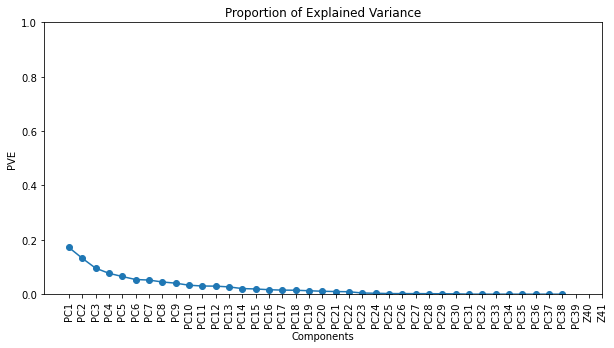

In [32]:
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_,marker = 'o')
plt.xlabel("Components")
plt.ylabel("PVE")
plt.ylim(0,1)
plt.xticks(np.arange(41),('PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13',
                         'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25',
                         'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
                         'PC38', 'PC39', 'Z40', 'Z41'), rotation = 'vertical')
plt.title("Proportion of Explained Variance")
plt.show()

In [33]:
pca= PCA(10)
pca.fit(rolling_pca)

fd = pca.components_
matrix = np.transpose(fd)
df_fl = pd.DataFrame(data=matrix, index=rolling_pca.columns,
                     columns=['Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'Z10'])
df_fl

,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10
T1_roll_Score,-0.271996,0.294871,0.055659,0.019451,0.015506,0.119677,-0.037293,-0.060733,0.028246,0.041295
T1_roll_FGM,-0.241047,0.260634,-0.005157,0.153538,-0.107317,0.077549,0.023725,-0.047328,0.126922,-0.060878
T1_roll_FGA,-0.122099,0.149017,0.076288,0.277751,-0.146236,0.111161,0.230997,0.248700,-0.138771,0.103368
T1_roll_FGM3,-0.163381,0.174956,-0.204178,0.038402,-0.153471,0.086333,-0.270027,0.137799,-0.192729,0.152760
T1_roll_FGA3,-0.110184,0.116643,-0.157299,0.087348,-0.166753,0.106568,-0.185273,0.258508,-0.316213,0.214457
T1_roll_FTA,-0.074318,0.098206,0.310375,-0.215611,0.313751,0.098443,0.094733,-0.134754,-0.038033,0.094499
T1_roll_FTM,-0.101758,0.112890,0.266055,-0.253745,0.323969,0.086933,0.037977,-0.142576,-0.041962,0.110808
T1_roll_OR,-0.040823,0.066449,0.251818,0.179521,0.040277,-0.104480,0.348282,0.288706,-0.135044,0.009179
T1_roll_DR,-0.166037,0.146455,0.023951,0.048392,0.001158,-0.066469,0.112415,-0.172919,0.149297,-0.337378
T1_roll_Ast,-0.181266,0.213743,-0.011341,0.150094,-0.138201,-0.004114,-0.069610,-0.109521,0.114632,-0.047580


In [34]:
rolling_scored = pd.DataFrame(pca.fit_transform(rolling_pca))
rolling_scored.columns = ['Eig1', 'Eig2', 'Eig3', 'Eig4', 'Eig5', 'Eig6', 'Eig7', 'Eig8', 'Eig9', 'Eig10']
rolling_scored.head()

,Eig1,Eig2,Eig3,Eig4,Eig5,Eig6,Eig7,Eig8,Eig9,Eig10
0,3.599597,-1.253879,-0.245412,3.241439,-0.267404,1.651789,1.096736,-0.750130,-0.787181,-1.207318
1,-0.659378,3.604837,-1.010444,-0.750407,-1.056281,0.342490,-0.784104,-2.003939,2.239348,0.281568
2,0.625085,-2.032587,0.379829,0.109609,-3.707204,0.666542,0.476119,0.777122,-2.063805,-0.522049
3,-1.927012,0.265206,-1.315239,-0.250342,-2.183562,-2.630124,0.056104,0.942193,1.385150,-0.326192
4,-2.498042,1.149358,2.603683,-0.089266,2.589944,0.085001,1.631334,-0.624435,-1.216318,-1.021190


#### Logistic

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(rolling_scored, y, test_size=0.2, random_state=13)

Model Score: 0.6524926686217009
[[227 121]
 [116 218]]


<AxesSubplot:ylabel='Feature'>

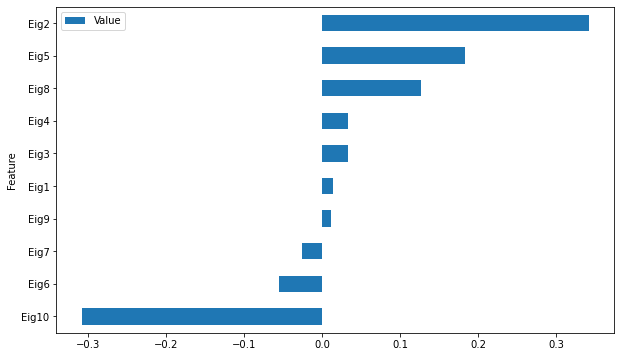

In [36]:
logistic_model(Xtrain, Xtest, ytrain, ytest, rolling_scored)

#### Random Forest

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(rolling_scored, y, test_size=0.2, random_state=13)

Model Score: 0.6422287390029325
[[217 131]
 [113 221]]


<AxesSubplot:ylabel='Feature'>

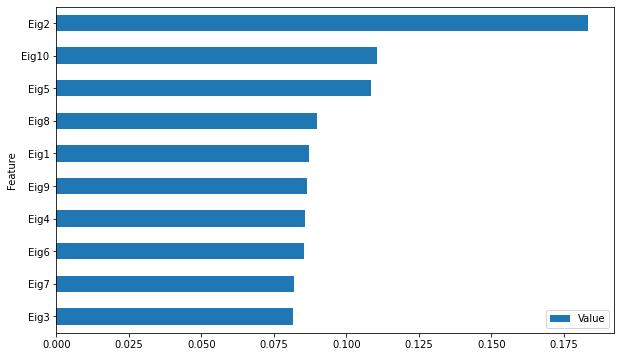

In [38]:
rf_model(Xtrain, Xtest, ytrain, ytest, rolling_scored)